In [1]:
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
# Registro de converters para uso de matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Carregamento da base de dados
base = pd.read_csv('../data/AirPassengers.csv')

# Conversão da coluna 'Month' para datetime
base['Month'] = pd.to_datetime(base['Month'], format='%Y-%m')

# Configuração da coluna 'Month' como índice
base.set_index('Month', inplace=True)

# Série temporal
ts = base['#Passengers']

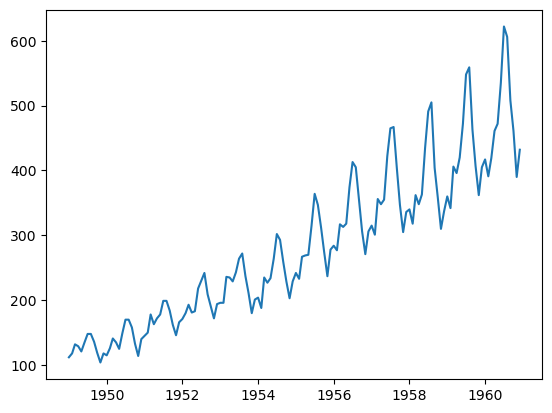

In [3]:
#visualização da série temporal
plt.plot(ts)

In [4]:
# Descomposição de série temporal, criando uma variálvel para cada formato
decomposicao = seasonal_decompose(ts)

In [5]:
#Tendência
tendencia = decomposicao.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [6]:
# Sazionalidade
sazonal = decomposicao.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [7]:
# erro
aleatorio = decomposicao.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

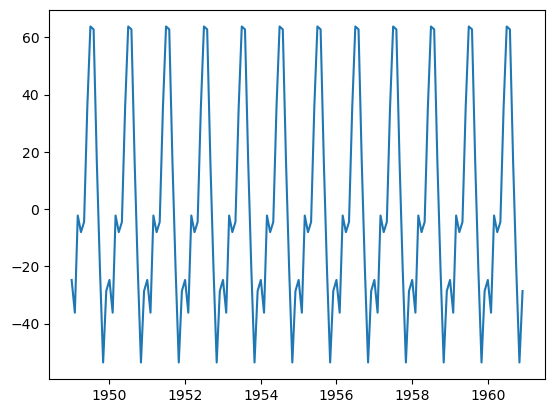

In [8]:
# Visualização para o formato da sazionalidade da série temporal
plt.plot(sazonal)

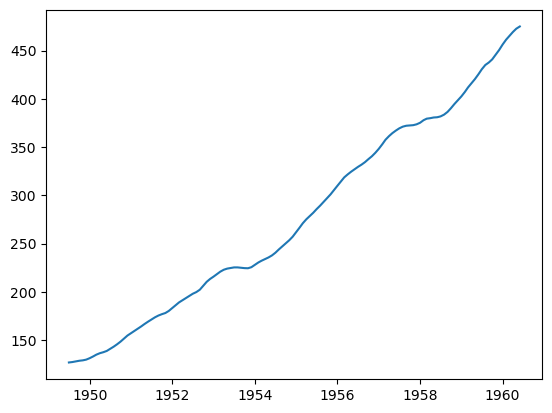

In [9]:
# Visualização para o formato da tendência da série temporal
plt.plot(tendencia)

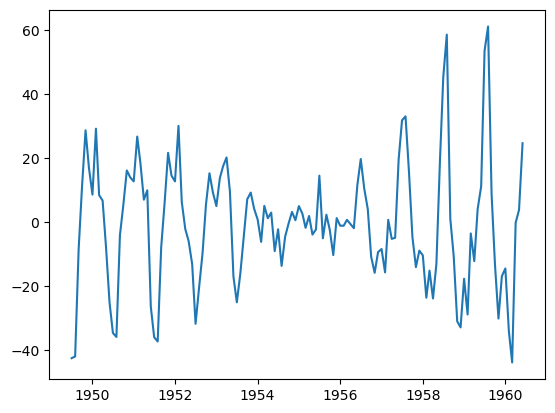

In [10]:
# Visualização para o formato da aleatoriedade da série temporal
plt.plot(aleatorio)

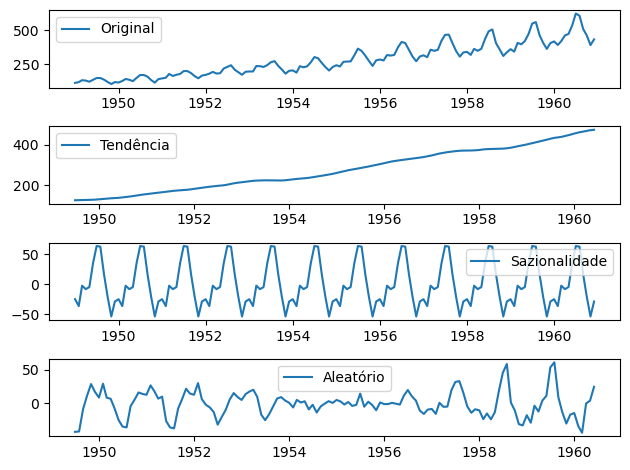

In [12]:
plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

# visualização somente da Tendência
plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'best')

# visualização somente da Sazionalidade
plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazionalidade')
plt.legend(loc = 'best')

# visualização somente da Aleatório
plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Aleatório')
plt.legend(loc = 'best')
plt.tight_layout()